In [117]:
#download the packages to use
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from collections import Counter
import matplotlib.pyplot as plt

In [118]:
#load the trainings and test data

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [119]:
train.shape


(6895, 70)

In [120]:
# Identify features with missing values
features_with_missing_values = train.columns[train.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = train[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']

Count of missing values for each feature:
value_eur                  2
club_loaned_from        6544
club_joined              351
nation_jersey_number    6482
release_clause_eur       353
player_tags             6124
player_traits           2589
pace                     631
shooting                 631
passing                  631
dribbling                631
defending                631
physic                   631
goalkeeping_speed       6264
dtype: int64


In [121]:
test.shape

(767, 69)

In [122]:
# Identify features with missing values
features_with_missing_values = test.columns[test.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = test[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed']

Count of missing values for each feature:
value_eur                 3
club_loaned_from        722
club_joined              45
nation_jersey_number    716
release_clause_eur       48
player_tags             682
player_traits           285
pace                     70
shooting                 70
passing                  70
dribbling                70
defending                70
physic                   70
goalkeeping_speed       697
dtype: int64


In [123]:
#create a new column called test_train to identify after which data belongs to test and train data
test['test_train']=0
train['test_train']=1


In [124]:
# concat train data with test data to have more observations, clean it all together and improve accuracy
all_data = pd.concat([train,test]).reset_index()

In [125]:
pd.set_option('display.max_columns', None)

# 1.Data Preprocessing and Quality Assurance: 

In [126]:
all_data.head()

,index,id,short_name,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,club_name,league_name,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nationality_name,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,test_train
0,0,216302,E. García,71,71,1400000.0,10000,1989-12-28,176,73,Club Atlético de San Luis,Mexican Liga MX,1,29,NaN,2021-07-12,2026,Mexico,NaN,Right,5,3,1,Medium/High,Normal (170-185),No,2400000.0,NaN,Early Crosser,70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,NaN,LB,1
1,1,237867,D. Cancola,65,71,1000000.0,2000,1996-10-23,183,73,Ross County FC,Scottish Premiership,1,4,NaN,2021-07-23,2022,Austria,NaN,Right,3,2,1,Medium/Medium,Lean (170-185),No,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,NaN,LDM,1
2,2,253472,E. Kahl,65,77,1600000.0,2000,2001-09-27,178,69,Aarhus GF,Danish Superliga,1,19,NaN,2021-07-24,2026,Sweden,NaN,Left,3,3,1,High/Medium,Normal (170-185),No,2300000.0,NaN,Speed Dribbler (AI),79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,NaN,LWB,1
3,3,223994,S. Mugoša,72,72,2300000.0,5000,1992-02-26,188,81,Incheon United FC,Korean K League 1,1,9,NaN,2018-02-08,2023,Montenegro,NaN,Right,3,3,1,High/Medium,Lean (185+),No,2900000.0,NaN,Finesse Shot,64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,87,69,52,18,76,60,75,75,16,22,19,16,15,13,8,9,NaN,LS,1
4,4,251635,A. Țigănașu,65,65,525000.0,3000,1990-06-12,179,74,FC Botoşani,Romanian Liga I,1,30,NaN,2019-07-01,2022,Romania,NaN,Left,2,2,1,Medium/High,Normal (170-185),No,709000.0,NaN,Solid Player,74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,70,67,53,63,60,52,52,58,64,61,58,12,5,11,12,15,NaN,LB,1


In [127]:
all_data.shape

(7662, 72)

In [128]:
all_data.isna().sum()

index                         0
id                            0
short_name                    0
overall                       0
potential                     0
                           ... 
goalkeeping_positioning       0
goalkeeping_reflexes          0
goalkeeping_speed          6961
position                    767
test_train                    0
Length: 72, dtype: int64

In [129]:
# Identify features with missing values
features_with_missing_values = all_data.columns[all_data.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = all_data[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed', 'position']

Count of missing values for each feature:
value_eur                  5
club_loaned_from        7266
club_joined              396
nation_jersey_number    7198
release_clause_eur       401
player_tags             6806
player_traits           2874
pace                     701
shooting                 701
passing                  701
dribbling                701
defending                701
physic                   701
goalkeeping_speed       6961
position                 767
dtype: int64


In [130]:
#commenting out just to check for GK classification
#eliminate all with over 80% missing data
#missing_percentages = all_data.isnull().sum() / len(all_data) * 100
#threshold = 80
#columns_to_drop = missing_percentages[missing_percentages >= threshold].index
#all_data = all_data.drop(columns_to_drop, axis=1)
#all_data.isna().sum()

In [131]:
#Also drop the ones I don't think apport any value
columns1 = ['short_name', 'club_name', 'league_name', 'nationality_name']
all_data = all_data.drop(columns1, axis=1)

In [132]:
# Identify features with missing values
features_with_missing_values = all_data.columns[all_data.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = all_data[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed', 'position']

Count of missing values for each feature:
value_eur                  5
club_loaned_from        7266
club_joined              396
nation_jersey_number    7198
release_clause_eur       401
player_tags             6806
player_traits           2874
pace                     701
shooting                 701
passing                  701
dribbling                701
defending                701
physic                   701
goalkeeping_speed       6961
position                 767
dtype: int64


In [133]:
all_data.shape

(7662, 68)

In [134]:
all_data[features_with_missing_values].head()


,value_eur,club_loaned_from,club_joined,nation_jersey_number,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,goalkeeping_speed,position
0,1400000.0,NaN,2021-07-12,NaN,2400000.0,NaN,Early Crosser,70.0,52.0,60.0,70.0,67.0,66.0,NaN,LB
1,1000000.0,NaN,2021-07-23,NaN,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,NaN,LDM
2,1600000.0,NaN,2021-07-24,NaN,2300000.0,NaN,Speed Dribbler (AI),79.0,35.0,58.0,66.0,59.0,64.0,NaN,LWB
3,2300000.0,NaN,2018-02-08,NaN,2900000.0,NaN,Finesse Shot,64.0,74.0,51.0,68.0,24.0,76.0,NaN,LS
4,525000.0,NaN,2019-07-01,NaN,709000.0,NaN,Solid Player,74.0,53.0,59.0,53.0,61.0,69.0,NaN,LB


In [135]:
all_data.describe()

,index,id,overall,potential,value_eur,wage_eur,height_cm,weight_kg,league_level,club_jersey_number,club_contract_valid_until,nation_jersey_number,weak_foot,skill_moves,international_reputation,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,test_train
count,7662.000000,7662.000000,7662.000000,7662.000000,7.657000e+03,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,464.000000,7662.000000,7662.000000,7662.000000,7.261000e+03,6961.000000,6961.000000,6961.000000,6961.000000,6961.000000,6961.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,7662.000000,701.000000,7662.000000
mean,3140.280084,223616.285435,68.842600,72.048029,4.331453e+06,12030.253198,181.484338,75.552467,1.361655,16.525320,2022.763508,12.056034,2.996346,2.451188,1.147481,8.187938e+06,68.568596,54.301250,60.085045,64.577791,55.609395,68.346215,52.883973,48.222527,55.069956,62.348865,44.775516,58.376273,50.381754,45.283738,56.815583,61.784652,65.905116,66.038110,65.287001,65.020752,64.850692,60.519838,67.255416,67.909554,68.229313,49.838684,59.815714,51.504960,53.130645,56.939441,49.895589,61.901592,51.349517,52.304098,49.800052,15.903289,15.672409,15.545680,15.813234,16.011877,40.375178,0.899896
std,2101.513688,26710.529813,5.951663,6.074939,1.045019e+07,24385.866372,6.860952,7.042419,0.761018,15.487419,1.207030,6.902991,0.685301,0.780693,0.470143,2.044656e+07,11.708722,14.354508,9.574193,9.348321,15.624753,8.509289,17.850296,19.569581,16.905886,13.281468,17.879807,17.897941,18.364759,17.835926,14.149990,15.398347,14.501858,14.401695,14.472439,7.930761,14.235664,13.076355,12.171742,15.096912,11.786433,19.300841,16.272640,20.123523,19.313219,13.559154,15.668827,10.886174,19.658360,20.918691,20.638862,17.466642,16.767293,16.319634,17.191808,17.877237,10.194699,0.300159
min,0.000000,41.000000,48.000000,53.000000,2.500000e+04,500.000000,156.000000,53.000000,1.000000,1.000000,2021.000000,1.000000,1.000000,1.000000,1.000000,3.900000e+04,28.000000,18.000000,25.000000,29.000000,16.000000,31.000000,7.000000,2.000000,5.000000,7.000000,4.000000,4.000000,7.000000,6.000000,9.000000,10.000000,15.000000,15.000000,19.000000,32.000000,19.000000,20.000000,27.000000,14.000000,25.000000,4.000000,11.000000,6.000000,2.000000,10.000000,8.000000,12.000000,4.000000,5.000000,6.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000,0.000000
25%,1148.250000,207642.250000,65.000000,68.000000,7.250000e+05,2000.000000,177.000000,70.000000,1.000000,6.000000,2022.000000,6.000000,3.000000,2.000000,1.000000,1.100000e+06,62.000000,43.000000,54.000000,59.000000,43.000000,63.000000,42.000000,33.000000,48.000000,58.000000,31.000000,53.000000,37.000000,32.000000,50.000000,58.000000,58.000000,59.000000,57.000000,60.000000,56.000000,51.000000,60.000000,63.000000,61.000000,35.000000,51.000000,33.000000,42.000000,48.000000,40.000000,56.000000,35.000000,34.000000,31.000000,8.000000,8.000000,8.000000,8.000000,8.000000,33.000000,1.000000

In [136]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 68 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        7662 non-null   int64  
 1   id                           7662 non-null   int64  
 2   overall                      7662 non-null   int64  
 3   potential                    7662 non-null   int64  
 4   value_eur                    7657 non-null   float64
 5   wage_eur                     7662 non-null   int64  
 6   birthday_date                7662 non-null   object 
 7   height_cm                    7662 non-null   int64  
 8   weight_kg                    7662 non-null   int64  
 9   league_level                 7662 non-null   int64  
 10  club_jersey_number           7662 non-null   int64  
 11  club_loaned_from             396 non-null    object 
 12  club_joined                  7266 non-null   object 
 13  club_contract_vali

In [137]:
# Cleaning player_traits

# Function to convert the string list to a list
def clean_traits(x):
    if isinstance(x, str):
        return x.split(',')
    else:
        return x

# Apply function to column
all_data['player_traits'] = all_data['player_traits'].apply(clean_traits)

# Look at number of unique player traits
traits = [trait for sublist in all_data[~all_data['player_traits'].isna()]['player_traits'] for trait in sublist]

# Count the occurrences of each string
trait_counts = Counter(traits)

# Get the unique strings and their counts
print('The number of unique traits is ' + str(len(trait_counts.keys())))

for key, count in trait_counts.items():
    print(f"{key}: {count}")



The number of unique traits is 48
Early Crosser: 216
Speed Dribbler (AI): 358
Finesse Shot: 272
Solid Player: 359
Cautious With Crosses: 54
Leadership: 371
 Long Passer (AI): 314
 Long Shot Taker (AI): 513
Long Throw-in: 270
 Comes For Crosses: 78
Injury Prone: 452
 Playmaker (AI): 365
 Outside Foot Shot: 317
 Technical Dribbler (AI): 620
 Leadership: 192
 Team Player: 396
 Dives Into Tackles (AI): 124
 Speed Dribbler (AI): 337
 Power Header: 230
Playmaker (AI): 116
Dives Into Tackles (AI): 378
Long Shot Taker (AI): 329
Flair: 416
 Flair: 225
Long Passer (AI): 300
 Giant Throw-in: 24
Power Header: 216
Chip Shot (AI): 13
Power Free-Kick: 126
 Solid Player: 32
Technical Dribbler (AI): 164
Rushes Out Of Goal: 49
 Saves with Feet: 67
Comes For Crosses: 72
 Finesse Shot: 88
Saves with Feet: 23
Outside Foot Shot: 39
Team Player: 121
 Injury Prone: 31
 Early Crosser: 123
 Chip Shot (AI): 65
 Cautious With Crosses: 43
 GK Long Throw: 19
 Rushes Out Of Goal: 38
GK Long Throw: 64
 One Club Playe

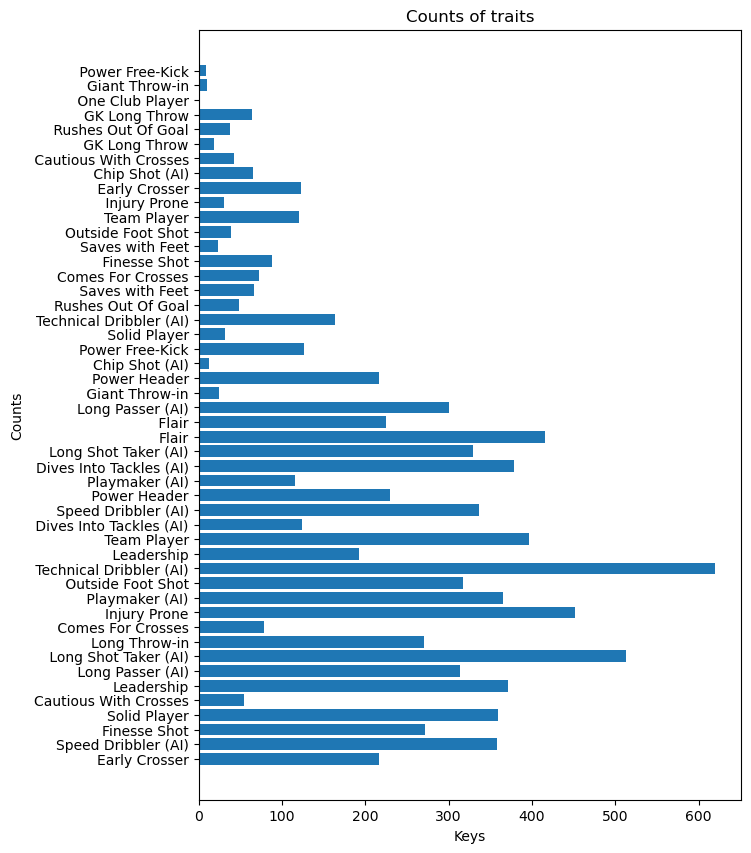

In [138]:
# Plot chart with traits
keys, counts = zip(*trait_counts.items())

fig, ax = plt.subplots(figsize=(7, 10))
ax.barh(keys, counts)
ax.set_xlabel('Keys')
ax.set_ylabel('Counts')
ax.set_title('Counts of traits')
plt.show()

In [139]:
# Commenting out the below based on new trait info above

# Calculate the frequency of each trait
#trait_frequency = all_data['player_traits'].value_counts(normalize=True)

# Map the traits to their frequencies
#all_data['player_traits_encoded'] = all_data['player_traits'].map(trait_frequency)

# Print the result
#print(all_data[['player_traits', 'player_traits_encoded']].head())
#test = all_data[['player_traits', 'player_traits_encoded']]

In [140]:
#encoding dates

# Convert 'birthdate' to a datetime object
all_data['club_joined'] = pd.to_datetime(all_data['club_joined'])
all_data['birthday_date'] = pd.to_datetime(all_data['birthday_date'])

# Define the reference date (e.g., the current date)
reference_date = datetime.now()

# Calculate the age by subtracting the birthdate from the reference date
all_data['yearinclub'] = (reference_date - all_data['club_joined']).dt.days // 365
all_data['age'] = (reference_date - all_data['birthday_date']).dt.days // 365
all_data['years_until_contract_expires'] =  all_data.club_contract_valid_until - datetime.today().year

# Print the result
print(all_data[['yearinclub', 'age', 'years_until_contract_expires']].head())


   yearinclub  age  years_until_contract_expires
0         2.0   33                             3
1         2.0   27                            -1
2         2.0   22                             3
3         5.0   31                             0
4         4.0   33                            -1


In [141]:
#extracting just the bodytype since it's accompanied by height of the player and there's already a column for it
def extract_bodytype(bodytype_string):
    return bodytype_string.split()[0]

# Apply the function to the 'bodytype' column
all_data['body_type'] = all_data['body_type'].apply(extract_bodytype)

print(all_data['body_type'].unique())



['Normal' 'Lean' 'Stocky' 'Unique']


In [142]:
#work_rate
print(all_data['work_rate'].unique())


['Medium/High' 'Medium/Medium' 'High/Medium' 'High/Low' 'High/High'
 'Medium/Low' 'Low/Medium' 'Low/High' 'Low/Low']


In [143]:
#Encoding all small unique values categorical data
encoder = LabelEncoder()
all_data['body_type_encoded'] = encoder.fit_transform(all_data['body_type'])
all_data['work_rate_encoded'] = encoder.fit_transform(all_data['work_rate'])
all_data['preferred_foot_encoded'] = encoder.fit_transform(all_data['preferred_foot'])
all_data['real_face_encoded'] = encoder.fit_transform(all_data['real_face'])

In [144]:
# Identify features with missing values
features_with_missing_values = all_data.columns[all_data.isnull().any()].tolist()

# Display the count of missing values for each feature
missing_values_count = all_data[features_with_missing_values].isnull().sum()

# Print the results
print("Features with missing values:")
print(features_with_missing_values)

print("\nCount of missing values for each feature:")
print(missing_values_count)

Features with missing values:
['value_eur', 'club_loaned_from', 'club_joined', 'nation_jersey_number', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'goalkeeping_speed', 'position', 'yearinclub']

Count of missing values for each feature:
value_eur                  5
club_loaned_from        7266
club_joined              396
nation_jersey_number    7198
release_clause_eur       401
player_tags             6806
player_traits           2874
pace                     701
shooting                 701
passing                  701
dribbling                701
defending                701
physic                   701
goalkeeping_speed       6961
position                 767
yearinclub               396
dtype: int64


In [145]:
#we use the KNNimputer to imputate the missing values in the numeric variables
def impute(data,columns):
    # Create KNNImputer object with k=8
    imputer = KNNImputer(n_neighbors=8)
    # Perform KNN imputation
    data[columns] = imputer.fit_transform(data[columns])
    return data[columns]

imputer_columns=['value_eur', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'yearinclub']

impute(all_data,imputer_columns)
all_data.isna().sum()

index                           0
id                              0
overall                         0
potential                       0
value_eur                       0
                               ..
years_until_contract_expires    0
body_type_encoded               0
work_rate_encoded               0
preferred_foot_encoded          0
real_face_encoded               0
Length: 75, dtype: int64

In [146]:
all_data.head()

,index,id,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,test_train,yearinclub,age,years_until_contract_expires,body_type_encoded,work_rate_encoded,preferred_foot_encoded,real_face_encoded
0,0,216302,71,71,1400000.0,10000,1989-12-28,176,73,1,29,NaN,2021-07-12,2026,NaN,Right,5,3,1,Medium/High,Normal,No,2400000.0,NaN,[Early Crosser],70.0,52.0,60.0,70.0,67.0,66.0,64,40,56,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,58,66,56,79,53,48,58,66,65,66,65,14,11,12,12,12,NaN,LB,1,2.0,33,3,1,6,1,0
1,1,237867,65,71,1000000.0,2000,1996-10-23,183,73,1,4,NaN,2021-07-23,2022,NaN,Right,3,2,1,Medium/Medium,Lean,No,2000000.0,NaN,NaN,65.0,38.0,58.0,60.0,63.0,67.0,50,31,59,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,66,42,66,66,48,62,46,59,65,61,58,10,13,7,6,11,NaN,LDM,1,2.0,27,-1,0,8,1,0
2,2,253472,65,77,1600000.0,2000,2001-09-27,178,69,1,19,NaN,2021-07-24,2026,NaN,Left,3,3,1,High/Medium,Normal,No,2300000.0,NaN,[Speed Dribbler (AI)],79.0,35.0,58.0,66.0,59.0,64.0,59,30,53,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,61,28,69,62,58,60,31,65,60,58,59,10,10,8,10,11,NaN,LWB,1,2.0,22,3,1,2,0,0
3,3,223994,72,72,2300000.0,5000,1992-02-26,188,81,1,9,NaN,2018-02-08,2023,NaN,Right,3,3,1,High/Medium,Lean,No,2900000.0,NaN,[Finesse Shot],64.0,74.0,51.0,68.0,24.0,76.0,32,78,75,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,87,69,52,18,76,60,75,75,16,22,19,16,15,13,8,9,NaN,LS,1,5.0,31,0,0,2,1,0
4,4,251635,65,65,525000.0,3000,1990-06-12,179,74,1,30,NaN,2019-07-01,2022,NaN,Left,2,2,1,Medium/High,Normal,No,709000.0,NaN,[Solid Player],74.0,53.0,59.0,53.0,61.0,69.0,64,38,49,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,70,67,53,63,60,52,52,58,64,61,58,12,5,11,12,15,NaN,LB,1,4.0,33,-1,1,6,0,0


In [147]:
#we start by normalizing the numerical data
def normalize_data(data):
    min_value = min(data)
    max_value = max(data)
    normalized_data = []

    for value in data:
        normalized_value = (value - min_value) / (max_value - min_value)
        normalized_data.append(normalized_value)

    return normalized_data

all_data['overall'] = normalize_data(all_data['overall'])
all_data['potential'] = normalize_data(all_data['potential'])
all_data['value_eur'] = normalize_data(all_data['value_eur'])
all_data['wage_eur'] = normalize_data(all_data['wage_eur'])
all_data['height_cm'] = normalize_data(all_data['height_cm'])
all_data['weight_kg'] = normalize_data(all_data['weight_kg'])
all_data['league_level'] = normalize_data(all_data['league_level'])
all_data['club_jersey_number'] = normalize_data(all_data['club_jersey_number'])
all_data['weak_foot'] = normalize_data(all_data['weak_foot'])
all_data['skill_moves'] = normalize_data(all_data['skill_moves'])
all_data['international_reputation'] = normalize_data(all_data['international_reputation'])
all_data['release_clause_eur'] = normalize_data(all_data['release_clause_eur'])
all_data['pace'] = normalize_data(all_data['pace'])
all_data['shooting'] = normalize_data(all_data['shooting'])
all_data['passing'] = normalize_data(all_data['passing'])
all_data['dribbling'] = normalize_data(all_data['dribbling'])
all_data['defending'] = normalize_data(all_data['defending'])
all_data['physic'] = normalize_data(all_data['physic'])
all_data['attacking_crossing'] = normalize_data(all_data['attacking_crossing'])
all_data['attacking_heading_accuracy'] = normalize_data(all_data['attacking_heading_accuracy'])
all_data['preferred_foot_encoded'] = normalize_data(all_data['preferred_foot_encoded'])
all_data['mentality_positioning'] = normalize_data(all_data['mentality_positioning'])
all_data['attacking_finishing'] = normalize_data(all_data['attacking_finishing'])
all_data['defending_sliding_tackle'] = normalize_data(all_data['defending_sliding_tackle'])
all_data['goalkeeping_reflexes'] = normalize_data(all_data['goalkeeping_reflexes'])
all_data['mentality_interceptions'] = normalize_data(all_data['mentality_interceptions'])
all_data['power_strength'] = normalize_data(all_data['power_strength'])

display(all_data)

,index,id,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,test_train,yearinclub,age,years_until_contract_expires,body_type_encoded,work_rate_encoded,preferred_foot_encoded,real_face_encoded
0,0,216302,0.511111,0.428571,0.007089,0.027182,1989-12-28,0.425532,0.40,0.00,0.285714,NaN,2021-07-12,2026,NaN,Right,1.00,0.50,0.0,Medium/High,Normal,No,0.006322,NaN,[Early Crosser],0.608696,0.447368,0.514706,0.621212,0.680000,0.593220,0.655172,0.408602,0.579545,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,0.471429,66,56,0.858824,0.542553,48,58,66,65,66,0.686047,14,11,12,12,0.113636,NaN,LB,1,2.0,33,3,1,6,1.0,0
1,1,237867,0.377778,0.428571,0.005026,0.004292,1996-10-23,0.574468,0.40,0.00,0.030612,NaN,2021-07-23,2022,NaN,Right,0.50,0.25,0.0,Medium/Medium,Lean,No,0.005251,NaN,NaN,0.536232,0.263158,0.485294,0.469697,0.626667,0.610169,0.494253,0.311828,0.613636,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,0.585714,42,66,0.705882,0.489362,62,46,59,65,61,0.604651,10,13,7,6,0.102273,NaN,LDM,1,2.0,27,-1,0,8,1.0,0
2,2,253472,0.377778,0.571429,0.008120,0.004292,2001-09-27,0.468085,0.32,0.00,0.183673,NaN,2021-07-24,2026,NaN,Left,0.50,0.50,0.0,High/Medium,Normal,No,0.006054,NaN,[Speed Dribbler (AI)],0.739130,0.223684,0.485294,0.560606,0.573333,0.559322,0.597701,0.301075,0.545455,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,0.514286,28,69,0.658824,0.595745,60,31,65,60,58,0.616279,10,10,8,10,0.102273,NaN,LWB,1,2.0,22,3,1,2,0.0,0
3,3,223994,0.533333,0.452381,0.011728,0.012876,1992-02-26,0.680851,0.56,0.00,0.081633,NaN,2018-02-08,2023,NaN,Right,0.50,0.50,0.0,High/Medium,Lean,No,0.007661,NaN,[Finesse Shot],0.521739,0.736842,0.382353,0.590909,0.106667,0.762712,0.287356,0.817204,0.795455,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,0.885714,69,52,0.141176,0.787234,60,75,75,16,22,0.151163,16,15,13,8,0.079545,NaN,LS,1,5.0,31,0,0,2,1.0,0
4,4,251635,0.377778,0.285714,0.002578,0.007153,1990-06-12,0.489362,0.42,0.00,0.295918,NaN,2019-07-01,2022,NaN,Left,0.25,0.25,0.0,Medium/High,Normal,No,0.001794,NaN,[Solid Player],0.666667,0.460526,0.500000,0.363636,0.600000,0.644068,0.655172,0.387097,0.500000,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,0.642857,67,53,0.670588,0.617021,52,52,58,64,61,0.604651,12,5,11,12,0.147727,NaN,LB,1,4.0,33,-1,1,6,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7657,762,205601,0.533333,0.452381,0.011728,0.047210,1992-01-10,0.191489,0.24,0.00,0.020408,NaN,2021-07-17,2025,NaN,Left,0.50,0.50,0.0,Medium/Low,Lean,Yes,0.010071,NaN,[Speed Dribbler (AI)],0.782609,0.631579,0.632353,0.696970,0.240000,0.152542,0.701149,0.655914,0.477273,70,58,76,70,58,61,72,86,78,86,65,87,72,65,50,0.085714,66,43,0.341176,0.755319,71,70,64,30,33,0.302326,13,12,12,10,0.079545,NaN,NaN,0,2.0,31,2,0,7,0.0,1
7658,763,22375

In [148]:
#we deconcatenate again the test data and train data from the all_data
train_data = all_data.loc[all_data.test_train == 1]
test_data = all_data.loc[all_data.test_train == 0]

In [149]:
#We check that it deconcatenated properly and we are working with the correct dataframes
train_data.shape,test_data.shape

((6895, 75), (767, 75))

In [150]:
#We get all the columns names by a list
all_columns = all_data.columns.tolist()
print("All column names:", all_columns)

All column names: ['index', 'id', 'overall', 'potential', 'value_eur', 'wage_eur', 'birthday_date', 'height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'club_loaned_from', 'club_joined', 'club_contract_valid_until', 'nation_jersey_number', 'preferred_foot', 'weak_foot', 'skill_moves', 'international_reputation', 'work_rate', 'body_type', 'real_face', 'release_clause_eur', 'player_tags', 'player_traits', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_v

In [152]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(train_data[['position']]).toarray()
# Convert the encoded data back to a dataframe
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out (['position']))
# Concatenate the encoded dataframe with the 'id' column
encoded_df = pd.concat([train_data['id'], encoded_df], axis=1)
train_data = pd.concat([train_data, encoded_df], axis=1)

In [153]:
train_data.head()

,index,id,overall,potential,value_eur,wage_eur,birthday_date,height_cm,weight_kg,league_level,club_jersey_number,club_loaned_from,club_joined,club_contract_valid_until,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,position,test_train,yearinclub,age,years_until_contract_expires,body_type_encoded,work_rate_encoded,preferred_foot_encoded,real_face_encoded,id,position_CAM,position_CB,position_CDM,position_CM,position_GK,position_LB,position_LCB,position_LCM,position_LDM,position_LF,position_LM,position_LS,position_LW,position_LWB,position_RB,position_RCB,position_RCM,position_RDM,position_RF,position_RM,position_RS,position_RW,position_RWB,position_ST
0,0,216302,0.511111,0.428571,0.007089,0.027182,1989-12-28,0.425532,0.40,0.0,0.285714,NaN,2021-07-12,2026,NaN,Right,1.00,0.50,0.0,Medium/High,Normal,No,0.006322,NaN,[Early Crosser],0.608696,0.447368,0.514706,0.621212,0.680000,0.593220,0.655172,0.408602,0.579545,65,41,68,64,58,58,68,71,70,87,61,86,67,77,86,0.471429,66,56,0.858824,0.542553,48,58,66,65,66,0.686047,14,11,12,12,0.113636,NaN,LB,1,2.0,33,3,1,6,1.0,0,216302,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,237867,0.377778,0.428571,0.005026,0.004292,1996-10-23,0.574468,0.40,0.0,0.030612,NaN,2021-07-23,2022,NaN,Right,0.50,0.25,0.0,Medium/Medium,Lean,No,0.005251,NaN,NaN,0.536232,0.263158,0.485294,0.469697,0.626667,0.610169,0.494253,0.311828,0.613636,64,31,57,36,41,64,65,64,65,57,62,67,49,62,71,0.585714,42,66,0.705882,0.489362,62,46,59,65,61,0.604651,10,13,7,6,0.102273,NaN,LDM,1,2.0,27,-1,0,8,1.0,0,237867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,253472,0.377778,0.571429,0.008120,0.004292,2001-09-27,0.468085,0.32,0.0,0.183673,NaN,2021-07-24,2026,NaN,Left,0.50,0.50,0.0,High/Medium,Normal,No,0.006054,NaN,[Speed Dribbler (AI)],0.739130,0.223684,0.485294,0.560606,0.573333,0.559322,0.597701,0.301075,0.545455,60,37,65,56,35,55,64,82,77,71,62,75,50,65,67,0.514286,28,69,0.658824,0.595745,60,31,65,60,58,0.616279,10,10,8,10,0.102273,NaN,LWB,1,2.0,22,3,1,2,0.0,0,253472,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,223994,0.533333,0.452381,0.011728,0.012876,1992-02-26,0.680851,0.56,0.0,0.081633,NaN,2018-02-08,2023,NaN,Right,0.50,0.50,0.0,High/Medium,Lean,No,0.007661,NaN,[Finesse Shot],0.521739,0.736842,0.382353,0.590909,0.106667,0.762712,0.287356,0.817204,0.795455,59,70,65,48,53,45,74,61,66,64,67,53,71,71,75,0.885714,69,52,0.141176,0.787234,60,75,75,16,22,0.151163,16,15,13,8,0.079545,NaN,LS,1,5.0,31,0,0,2,1.0,0,223994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,251635,0.377778,0.285714,0.002578,0.007153,1990-06-12,0.489362,0.42,0.0,0.295918,NaN,2019-07-01,2022,NaN,Left,0.25,0.25,0.0,Medium/High,Normal,No,0.001794,NaN,[Solid Player],0.666667,0.460526,0.500000,0.363636,0.600000,0.644068,0.655172,0.387097,0.500000,63,46,43,53,58,55,56,71,76,70,60,71,72,80,78,0.642857,67,53,0.670588,0.617021,52,52,58,64,61,0.604651,12,5,11,12,0.147727,NaN,LB,1,4.0,33,-1,1,6,0.0,0,251635,0.0,0.0,0.0,0.0,0.0,1.0,0

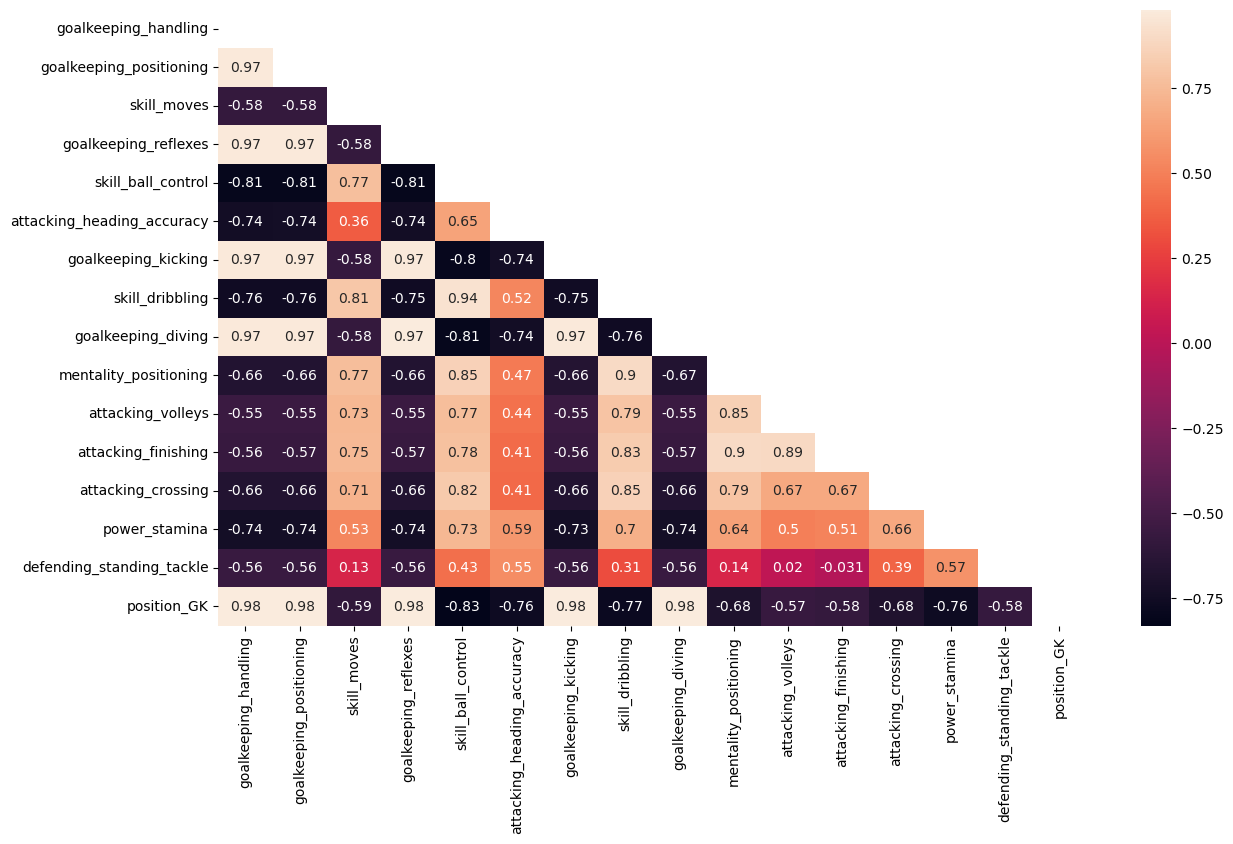

In [164]:
# Let's calculate the correlations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df2 = train_data[['goalkeeping_handling', 'goalkeeping_positioning', 'skill_moves', 'goalkeeping_reflexes', 'skill_ball_control', 'attacking_heading_accuracy', 'goalkeeping_kicking', 'skill_dribbling', 'goalkeeping_diving', 'mentality_positioning', 'attacking_volleys', 'attacking_finishing', 'attacking_crossing', 'power_stamina', 'defending_standing_tackle', 'position_GK' ]]
df2_corr = df2.corr()

# Plot correlations
# Remove upper triangle
fig, ax = plt.subplots(figsize=(14,8))
mask = np.zeros_like(df2_corr)
mask[np.triu_indices_from(mask)] = True
ax = sns.heatmap(df2_corr, mask = mask, annot = True)

In [154]:
#first we try to classify for GK
from sklearn.model_selection import train_test_split
columns_for_prediction = ['overall', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'yearinclub', 'age', 'years_until_contract_expires', 'body_type_encoded', 'work_rate_encoded', 'preferred_foot_encoded', 'real_face_encoded']
X = train_data[columns_for_prediction] # Features
y = train_data['position_GK']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [159]:
#Since there is too many columns we first choose which are the most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train a RandomForestClassifier to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature importances:")
print(feature_importance_df)

# Select the top k features based on importance
k = 15  # You can choose your desired number of top features
selected_featuresgk = feature_importance_df.head(k)['Feature'].tolist()

# Print the selected features
print(f"\nTop {k} selected features:")
print(selected_featuresgk)

Feature importances:
                         Feature  Importance
48          goalkeeping_handling    0.116719
50       goalkeeping_positioning    0.105512
9                    skill_moves    0.089471
51          goalkeeping_reflexes    0.077889
27            skill_ball_control    0.072198
20    attacking_heading_accuracy    0.069336
49           goalkeeping_kicking    0.067364
23               skill_dribbling    0.067309
47            goalkeeping_diving    0.062871
40         mentality_positioning    0.053679
22             attacking_volleys    0.034638
19           attacking_finishing    0.033212
18            attacking_crossing    0.027338
35                 power_stamina    0.023459
45     defending_standing_tackle    0.019134
37              power_long_shots    0.016374
42           mentality_penalties    0.014852
38          mentality_aggression    0.011583
21       attacking_short_passing    0.008977
24                   skill_curve    0.008040
44   defending_marking_awareness  

In [160]:
target = ['position_GK']
X = train_data[selected_featuresgk] # Features selected from the model above
y = train_data[target]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [176]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Prepare data for modeling
X = train_data[selected_featuresgk]
y = train_data['position_GK']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a decision tree model
rf_gk = RandomForestClassifier(random_state=42)
rf_gk.fit(X_train, y_train)

# Model evaluation
y_pred = rf_gk.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1257
         1.0       1.00      1.00      1.00       122

    accuracy                           1.00      1379
   macro avg       1.00      1.00      1.00      1379
weighted avg       1.00      1.00      1.00      1379



In [177]:
# Predict probabilities
proba_predictions = rf_gk.predict_proba(X)

# Add probability column to the DataFrame
train_data['gk_probability'] = proba_predictions[:, 1]

# Identify candidates for other positions
train_other_position_candidates = train_data[train_data['gk_probability'] < 0.5]


In [174]:
train_other_position_candidates.shape

(6264, 101)

In [170]:
#first we try to classify for the rest
from sklearn.model_selection import train_test_split
columns_for_prediction = ['overall', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'yearinclub', 'age', 'years_until_contract_expires', 'body_type_encoded', 'work_rate_encoded', 'preferred_foot_encoded', 'real_face_encoded']
X = train_other_position_candidates[columns_for_prediction] # Features
y = train_other_position_candidates['position']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [171]:
#Since there is too many columns we first choose which are the most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train a RandomForestClassifier to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature importances:")
print(feature_importance_df)

# Select the top k features based on importance
k = 15  # You can choose your desired number of top features
selected_features = feature_importance_df.head(k)['Feature'].tolist()

# Print the selected features
print(f"\nTop {k} selected features:")
print(selected_features)

Feature importances:
                         Feature  Importance
18            attacking_crossing    0.031220
57        preferred_foot_encoded    0.030428
20    attacking_heading_accuracy    0.028602
46      defending_sliding_tackle    0.027944
16                     defending    0.027326
19           attacking_finishing    0.025980
40         mentality_positioning    0.024909
44   defending_marking_awareness    0.024063
39       mentality_interceptions    0.023816
36                power_strength    0.023396
13                      shooting    0.022240
29         movement_sprint_speed    0.021727
41              mentality_vision    0.021452
45     defending_standing_tackle    0.020920
12                          pace    0.020734
26            skill_long_passing    0.020667
28         movement_acceleration    0.020476
23               skill_dribbling    0.020467
30              movement_agility    0.020264
4                      height_cm    0.019729
32              movement_balance  

In [190]:
#now we classify for the rest of the positions 
target = ['position']
X = train_other_position_candidates[selected_features] # Features selected from the model above
y = train_other_position_candidates[target]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [191]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)
# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

#Lightgbm estimator
#light_model = lgb.LGBMClassifier(n_estimators=100, random_state=42)
#light_model.fit(X_train, y_train)
#light_predictions = light_model.predict(X_test)
# Evaluate the Loghtgbm model
#light_accuracy = accuracy_score(y_test, light_predictions)
#print("Light Accuracy:", light_accuracy)


Random Forest Accuracy: 0.27693535514764567
Gradient Boosting Accuracy: 0.26256983240223464


In [216]:
from sklearn.model_selection import train_test_split
columns_for_prediction = ['overall','gk_probability', 'potential', 'value_eur', 'wage_eur', 'height_cm', 'weight_kg', 'league_level', 'club_jersey_number', 'weak_foot', 'skill_moves', 'international_reputation', 'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure', 'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes', 'yearinclub', 'age', 'years_until_contract_expires', 'body_type_encoded', 'work_rate_encoded', 'preferred_foot_encoded', 'real_face_encoded']
X = train_data[columns_for_prediction] # Features
y = train_data['position']  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [217]:
#Since there is too many columns we first choose which are the most important features
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Train a RandomForestClassifier to get feature importances
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the sorted feature importances
print("Feature importances:")
print(feature_importance_df)

# Select the top k features based on importance
k = 30  # You can choose your desired number of top features
selected_features2 = feature_importance_df.head(k)['Feature'].tolist()

# Print the selected features
print(f"\nTop {k} selected features:")
print(selected_features2)

Feature importances:
                         Feature  Importance
41         mentality_positioning    0.032123
19            attacking_crossing    0.031769
21    attacking_heading_accuracy    0.031570
58        preferred_foot_encoded    0.029663
47      defending_sliding_tackle    0.023538
20           attacking_finishing    0.023381
51       goalkeeping_positioning    0.023348
40       mentality_interceptions    0.022737
45   defending_marking_awareness    0.022531
37                power_strength    0.022158
17                     defending    0.021908
46     defending_standing_tackle    0.021496
48            goalkeeping_diving    0.020543
23             attacking_volleys    0.020403
30         movement_sprint_speed    0.020378
5                      height_cm    0.020262
49          goalkeeping_handling    0.019783
14                      shooting    0.019701
52          goalkeeping_reflexes    0.019394
24               skill_dribbling    0.019274
38              power_long_shots  

In [218]:
#now we classify for the rest of the positions 
target = ['position']
X = train_other_position_candidates[selected_features2] # Features selected from the model above
y = train_other_position_candidates[target]  # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [219]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score
import lightgbm as lgb

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Train a Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_predictions = gb_model.predict(X_test)
# Evaluate the Gradient Boosting model
gb_accuracy = accuracy_score(y_test, gb_predictions)
print("Gradient Boosting Accuracy:", gb_accuracy)

Random Forest Accuracy: 0.3758978451715882
Gradient Boosting Accuracy: 0.36233040702314445


In [186]:
#we start the test predict with GK
features_testgk = test_data[selected_featuresgk]
proba_predictions1 = rf_gk.predict_proba(features_testgk)

# Add probability column to the DataFrame
test_data['gk_probability'] = proba_predictions1[:, 1]
test_data['position'] = np.where(test_data['gk_probability'] > 0.5, 'GK', test_data['position'])
test_other_position_candidates = test_data[test_data['gk_probability'] < 0.5]


In [192]:
features_test = test_other_position_candidates[selected_features]

In [193]:
kaggle_predictions_rf = rf_model.predict(features_test)


In [195]:
# Produce .csv for kaggle testing
test_predictions_submit = pd.DataFrame({"id": test_other_position_candidates["id"], "position":kaggle_predictions_rf  })


In [196]:
# Merge the predictions with the original test_data based on the 'id' column
test_data = pd.merge(test_data, test_predictions_submit, on='id', how='left')

# Fill missing values in the 'position' column with the predictions
test_data['position_x'].fillna(test_data['position_y'], inplace=True)

# Drop the extra columns if needed
test_data.drop(['position_y', 'gk_probability'], axis=1, inplace=True)

# Rename the 'position_x' column back to 'position'
test_data.rename(columns={'position_x': 'position'}, inplace=True)

In [207]:
print(test_data['position'].isnull().sum())

0


In [208]:
print(test_data['id'].isnull().sum())

0


In [209]:
result_data = test_data[['id', 'position']].copy()

In [211]:
print(result_data.isnull().sum())

id          0
position    0
dtype: int64


In [204]:
test_predictions_submit1 = pd.DataFrame(test_data['id'], test_data['position'])


In [210]:
result_data.to_csv("result_data.csv", index = False)

In [205]:
test_predictions_submit1.to_csv("test_predictions_submit.csv", index = False)